In [37]:
from brian2 import *

In [38]:
%matplotlib inline

In [39]:
20*volt

20. * volt

In [40]:
1000*amp

1. * kamp

In [41]:
1e6*volt            #e6 is megavolt

1. * Mvolt

In [42]:
1000*namp

1. * uamp

In [43]:
10*nA*(5*Mohm)       #combinations of units 

50. * mvolt

In [44]:
# A SIMPLE NEURON MODEL

tau=10*ms
eqs='''                   
dv/dt=(1-v)/tau:1
'''      
# ''' is used for a multi-lined string
# after : we should write the unit of the variable(in this case v) 
# and 1 means it has not unit

In [45]:
# CREATE A NEURON

G=NeuronGroup(1,eqs)

#NeuronGroup is a class to create neuron groups!!
#NeuronGroup(number of neurons, our diffrential equation)

In [46]:
#ACTUALLY RUN A SIMULATION
start_scope()  #make sure any Brian objects created before,aren’t included in the next run of the simulation.
tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs)
run(100*ms)   #runs the simulation for 100 ms


In [47]:
start_scope()
tau=10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs)
print('Before v = %s' % G.v[0])   # by default variables start with the value zero
run(100*ms)
print('After v = %s' % G.v[0])

Before v = 0.0
After v = 0.9999546000702376


In [48]:
print('Expected value of v = %s' % (1-exp(-100*ms/tau)))
#last cell was for simulation and this one is the real value

Expected value of v = 0.9999546000702375


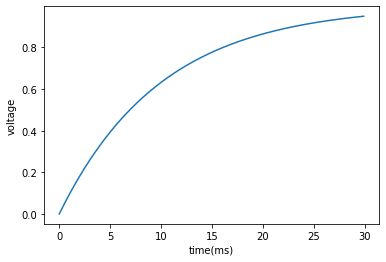

In [49]:
# VARIABLE V OVER TIME

start_scope()

G=NeuronGroup(1,eqs,method="exact")
M=StateMonitor(G,'v', record=True)     #to record the values of a neuron variable while the simulation runs
#we can set record=0 to record values for neuon0.We have to specify which neurons we want to record in large simulations
run(30*ms)
plot(M.t/ms,M.v[0]) 
xlabel("time(ms)")
ylabel("voltage");

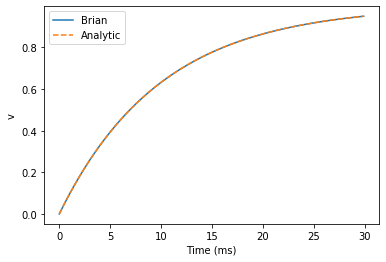

In [50]:
start_scope()

G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=0)

run(30*ms)

plot(M.t/ms, M.v[0], 'C0', label='Brian')
plot(M.t/ms, 1-exp(-M.t/tau), 'C1--',label='Analytic')
xlabel('Time (ms)')
ylabel('v')
legend(); 
#legend is with guide:))


WARNING    "t" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value 37. * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


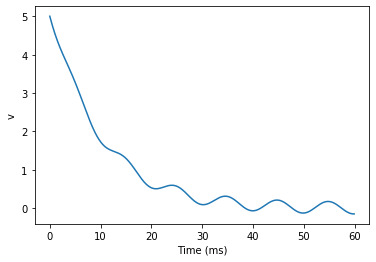

In [51]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (sin(2*pi*100*Hz*t)-v)/tau : 1
'''
G = NeuronGroup(1, eqs, method='euler') #Change to Euler method, exact integrator doesn't work here
M = StateMonitor(G, 'v', record=0)
G.v = 5  # initial value
run(60*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

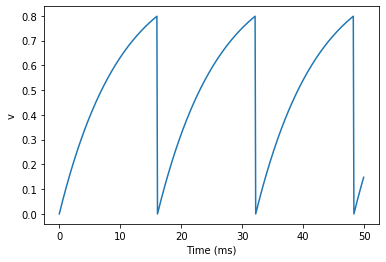

In [52]:
# ADDING SPIKING BEHAVIOUR
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')
# threshold:when to start firing_reset:after firing immediately reset
M = StateMonitor(G, 'v', record=0)
run(50*ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
#Brian has registered this event as a spike!!!

In [53]:
start_scope()

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

spikemon = SpikeMonitor(G)   # SHOWING SPIKES

run(50*ms)

print('Spike times: %s' % spikemon.t[:])


Spike times: [16.  32.1 48.2] ms


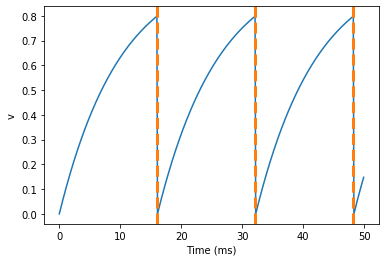

In [54]:
start_scope()

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3) #c is for color  # ls='--' type of line is dashed
xlabel('Time (ms)')
ylabel('v');

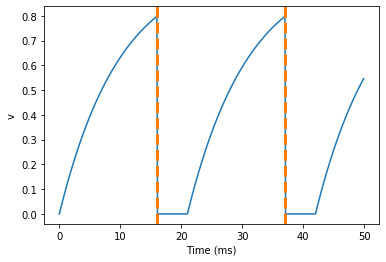

In [55]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1 (unless refractory)
'''
#without unless refractory the eqs, determines the value of v while neuron should be at rest for refrac. time!!
#tau=5*ms refract=15*ms 
#for t in spikemon.t axvline(t/ms, ls='--', c='C1', lw=3) axhline(0.8, ls=':', c='C2', lw=3)

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', refractory=5*ms, method='exact')

statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v');

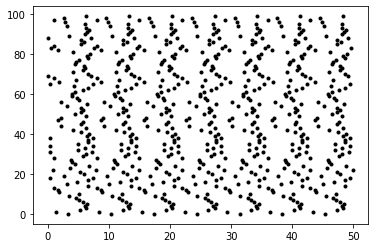

In [56]:
# MULTIPLE NEURONS
start_scope()

N=100
tau=10*ms

eqs='''
dv/dt=(2-v)/tau :1
'''

G=NeuronGroup(N,eqs,threshold="v>1", reset="v=0", method="exact")
G.v='rand()'  #initialise each neuron with a different uniform random value between 0 and 1

spikemon=SpikeMonitor(G)

run(50*ms)

plot(spikemon.t/ms, spikemon.i, '.k')   #which gives the corresponding neuron index for each spike
xlabel=('time (ms)')
ylabel=('Neuron Index');

# the standard "RASTER PLOT"

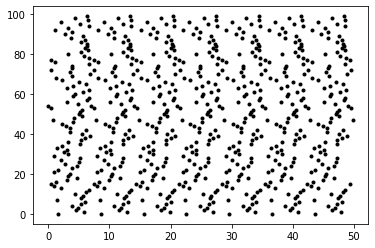

In [61]:

start_scope()

N = 100
tau = 10*ms
eqs = '''
dv/dt = (2-v)/tau : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')
G.v = 'rand()'

spikemon = SpikeMonitor(G)

run(50*ms)

plot(spikemon.t/ms, spikemon.i, '.k')
#xlabel('Time (ms)')
#ylabel('Neuron index');


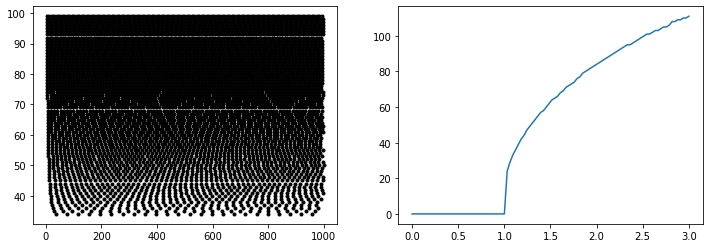

In [58]:
# per-neuron parameters


start_scope()

N = 100
tau = 10*ms
v0_max = 3.
duration = 1000*ms

eqs = '''
dv/dt = (v0-v)/tau : 1 (unless refractory)
v0 : 1
'''
#a new per-neuron parameter v0 with units 1 ----> every neuron has a special v0
#the rate at which it fires spikes will be related to the value of v0
#For v0<1 it will never fire a spike

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='exact')
M = SpikeMonitor(G)

G.v0 = 'i*v0_max/(N-1)'  #initialises the value of v0 for each neuron( varying from 0 up to v0_max)
                         #symbol i in strings like this refers to the neuron index.
run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
#xlabel('Time (ms)')
#ylabel('Neuron index')

subplot(122)
plot(G.v0, M.count/duration)  #firing rate=number of spikes each neuron fired  /  duration of the run
#xlabel('v0')
#ylabel('Firing rate (sp/s)');

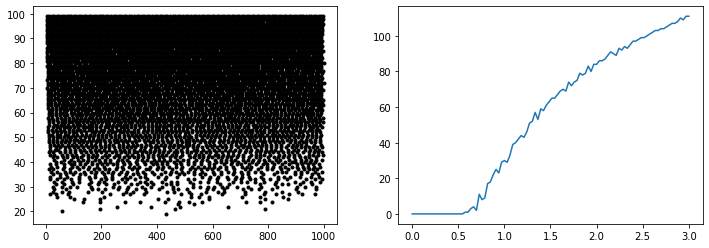

In [62]:
# STOCHASTIC NEURONS (various forms of neural noise)

start_scope()

N = 100
tau = 10*ms
v0_max = 3.
duration = 1000*ms
sigma = 0.2

eqs = '''
dv/dt = (v0-v)/tau+sigma*xi*tau**-0.5 : 1 (unless refractory)
v0 : 1
'''
# xi: this symbol is a “stochastic differential” but you can sort of thinking of it as just a
#Gaussian random variable with mean 0 and standard deviation 1

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='euler')
# the 'exact' method that we used earlier is not applicable to stochastic differential equations.
M = SpikeMonitor(G)

G.v0 = 'i*v0_max/(N-1)'

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
#xlabel('Time (ms)')
#ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
#xlabel('v0')
#ylabel('Firing rate (sp/s)');

# JUST SOME NOISE ADDED TO PREVIOUS SECTION

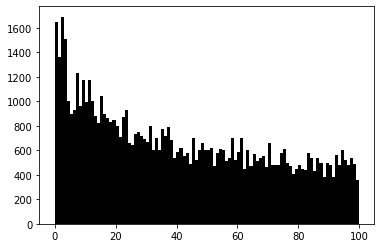

In [64]:
start_scope()

N = 1000
tau = 10*ms
vr = -70*mV
vt0 = -50*mV
delta_vt0 = 5*mV
tau_t = 100*ms
sigma = 0.5*(vt0-vr)
v_drive = 2*(vt0-vr)
duration = 100*ms

eqs = '''
dv/dt = (v_drive+vr-v)/tau + sigma*xi*tau**-0.5 : volt
dvt/dt = (vt0-vt)/tau_t : volt
'''

reset = '''
v = vr
vt += delta_vt0
'''

G = NeuronGroup(N, eqs, threshold='v>vt', reset=reset, refractory=5*ms, method='euler')
spikemon = SpikeMonitor(G)

G.v = 'rand()*(vt0-vr)+vr'
G.vt = vt0

run(duration)

_ = hist(spikemon.t/ms, 100, histtype='stepfilled', facecolor='k', weights=ones(len(spikemon))/(N*defaultclock.dt))
#xlabel('Time (ms)')
#ylabel('Instantaneous firing rate (sp/s)');